# 5. Statistical Packages in Python for Mathematicians

Statisticians use the following packages in Python:

- Data creation: `random`
- Data analysis/manipulation: `pandas`, `scikit-learn`
- Statistical functions: `scipy.stats`
- Statistical data visualization: `matplotlib`, `seaborn`
- Statistical data exploration: `statsmodels`


## Table of Contents

- Random
- Scipy Statistics
- Seaborn
- Statistical Models
- Python vs. R

Next week? Choose among:

- Machine Learning 2/Deep Learning: `scikit-learn`, `keras`, `tensorflow`
- SAGE
- Other: ___________?



## 5.1 Random

The `random` package implements pseudo-random number generators for various distributions.

In [1]:
import random

The documentation is available here: https://docs.python.org/3/library/random.html.

In [2]:
help(random)

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.7/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)
               lognormal
               negative exponential
               gamma
             

Almost all module functions depend on the basic function `random()`, which generates a random float uniformly in the semi-open range `[0.0, 1.0)`. Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of `2**19937-1`. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.

In [3]:
random.uniform(0,1)

0.5154635448745807

For integers, there is uniform selection from a range. For sequences, there is uniform selection of a random element. Let's play a simple game.

In [4]:
number = random.choice(range(1,11))
choice = 0

while number != choice:
    choice = int(input('Choose a number between 1 and 10 (inclusive): '))

print('Congratulations, you have guessed the right number!')

Choose a number between 1 and 10 (inclusive): 3
Congratulations, you have guessed the right number!


If we used the following line, the number above would be equal to `3`:

In [5]:
random.seed(2) # initialize the random number generator

We can also use NumPy's random sampling package `numpy.random` (https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html):

In [6]:
import numpy as np

np.random.uniform(0,1)

0.6805412560781241

In [18]:
# dir(np.random)

With this package, we could immediately create samples drawn from a specific distribution:

In [7]:
sample = np.random.normal(0,1,100000)
# sample

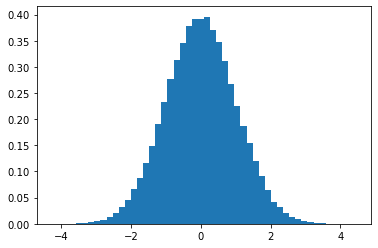

In [8]:
import matplotlib.pyplot as plt

plt.hist(sample, bins=50, density=True)
plt.show()

## 5.2 Scipy Statistics

This module contains a large number of probability distributions.

In [9]:
import scipy.stats

In [10]:
help(scipy.stats)

Help on package scipy.stats in scipy:

NAME
    scipy.stats - .. _statsrefmanual:

DESCRIPTION
    Statistical functions (:mod:`scipy.stats`)
    
    .. currentmodule:: scipy.stats
    
    This module contains a large number of probability distributions as
    well as a growing library of statistical functions.
    
    Each univariate distribution is an instance of a subclass of `rv_continuous`
    (`rv_discrete` for discrete distributions):
    
    .. autosummary::
       :toctree: generated/
    
       rv_continuous
       rv_discrete
       rv_histogram
    
    Continuous distributions
    
    .. autosummary::
       :toctree: generated/
    
       alpha             -- Alpha
       anglit            -- Anglit
       arcsine           -- Arcsine
       argus             -- Argus
       beta              -- Beta
       betaprime         -- Beta Prime
       bradford          -- Bradford
       burr              -- Burr (Type III)
       burr12            -- Burr (Type XII)
   

Let's plot some probability density functions of the Gaussian distribution:

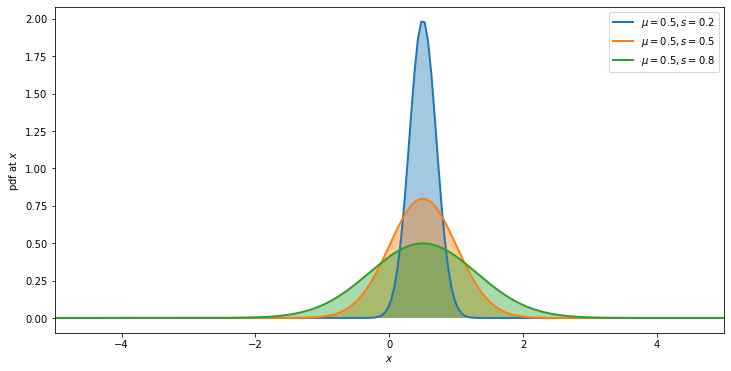

In [11]:
from scipy.stats import norm

x = np.linspace(-5,5,num=200)

fig = plt.figure(figsize=(12,6))
for mu, s in zip([0.5, 0.5, 0.5], [0.2, 0.5, 0.8]):
    plt.plot(x, norm.pdf(x,mu,s), lw=2, 
             label="$\mu={0:.1f}, s={1:.1f}$".format(mu, s))
    plt.fill_between(x, norm.pdf(x, mu, s), alpha = .4)

plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("pdf at $x$")
plt.xlabel("$x$")
plt.show()

Let's create an interactive plot of the Gamma distribution:

In [12]:
%%capture

from ipywidgets import interactive
from scipy.stats import gamma

x = np.arange(0, 40, 0.005)

shape, scale = 5, 0.5
fig, ax = plt.subplots()
y = gamma.pdf(x, shape, scale=scale)
line = ax.plot(x, y)
ax.set_ylim((0,0.5))

def gamma_update(shape, scale):
    y = gamma.pdf(x, shape, scale=scale)
    line[0].set_ydata(y)
    fig.canvas.draw()
    display(fig)


In [13]:
interactive(gamma_update, shape=(0.1, 10.0), scale=(0.3, 3.0))

interactive(children=(FloatSlider(value=5.05, description='shape', max=10.0, min=0.1), FloatSlider(value=1.650…

## 5.3 Seaborn

Seaborn is a Python data visualization library based on `matplotlib`. It is the equivalent to `R`'s package `ggplot2` and provides a high-level interface for drawing attractive and informative statistical graphics.

In [14]:
import seaborn as sns

We will create some basic `seaborn` plots. A gallery is alvailable here: http://seaborn.pydata.org/examples/index.html.

A scatterplot of a bivariate normal distribution:

In [15]:
import pandas as pd

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(data, columns=["x", "y"])

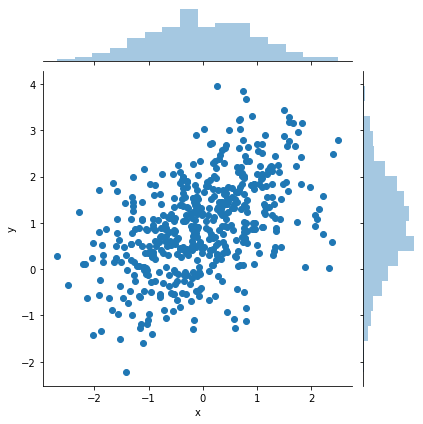

In [16]:
sns.jointplot(x="x", y="y", data=df)

A scatterplot matrix:

In [17]:
df

,x,y
0,0.336964,1.214573
1,1.284755,2.211108
2,0.090990,1.798512
3,1.170703,1.311941
4,0.911352,3.309134
...,...,...
495,-0.377686,-0.516733
496,-0.791256,-0.592723
497,1.276708,1.563835
498,0.585085,1.401559


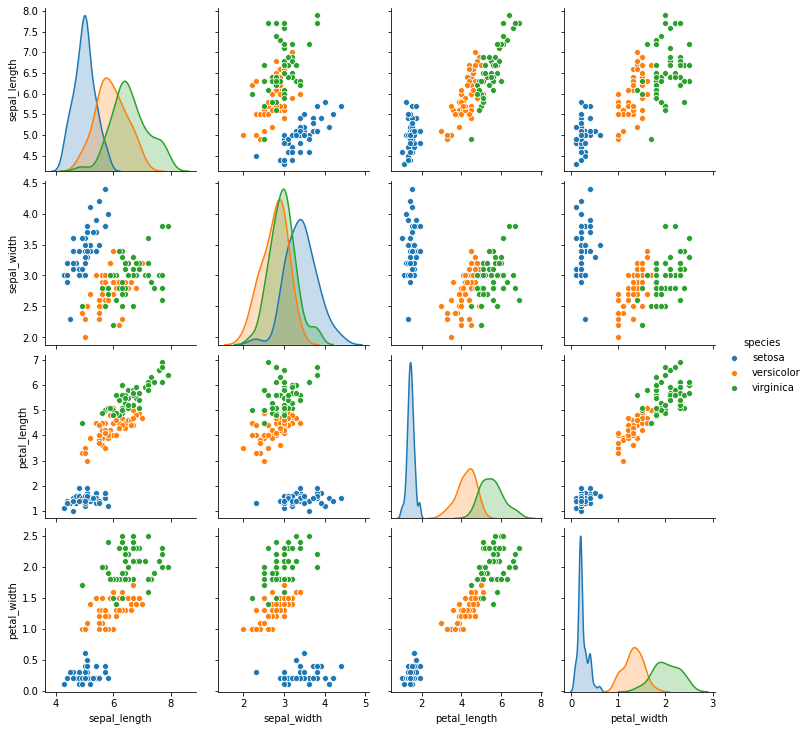

In [18]:
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [19]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


A linear model plot:

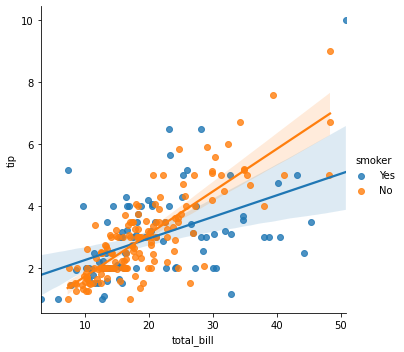

In [20]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="smoker")

## 5.4 Statistical Models

Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. It complements SciPy's stats module.

In [21]:
import numpy as np
import statsmodels.api as sm

The user guide can be found here: https://www.statsmodels.org/stable/user-guide.html.

Let's explore our `iris` dataset again:

In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We would like to know whether the `sepal_length` depends on the explanatory variable `species`. Let's create a boxplot:

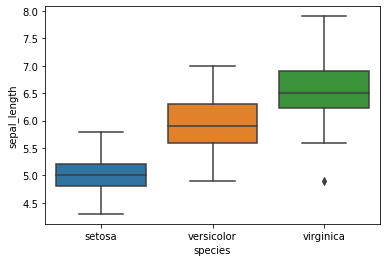

In [23]:
sns.boxplot(x="species", y="sepal_length", data=df)

It seems like this is indeed the case. However, we need to perform some statistical test to conclude this. Let's do some ANOVA (see syllabus Statistical Models, M. de Gunst):

In [24]:
lm = sm.OLS.from_formula('sepal_length ~ species', data=df)
fitted_model = lm.fit()
print(sm.stats.anova_lm(fitted_model))

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


We conclude that `species` is a significant explanatory variable for `sepal_length`. We can find the coefficients using the following code:

In [25]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.67e-31
Time:                        17:21:10   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.00

Now let's explore a dataset from `statsmodels`:

In [26]:
spector_data = sm.datasets.spector.load_pandas().data
spector_data

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0
5,2.86,17.0,0.0,0.0
6,2.76,17.0,0.0,0.0
7,2.87,21.0,0.0,0.0
8,3.03,25.0,0.0,0.0
9,3.92,29.0,0.0,1.0


We will again do some ANOVA:

In [27]:
m = sm.OLS.from_formula('GRADE ~ GPA + TUCE', spector_data)

In [28]:
print(m.df_model, m.df_resid)
print(m.endog_names, m.exog_names)

2.0 29.0
GRADE ['Intercept', 'GPA', 'TUCE']


In [29]:
res = m.fit()

In [30]:
# res.summary()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5.136
Date:                Sun, 16 Aug 2020   Prob (F-statistic):             0.0123
Time:                        17:21:15   Log-Likelihood:                -16.730
No. Observations:                  32   AIC:                             39.46
Df Residuals:                      29   BIC:                             43.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4494      0.578     -2.506      0.0

From this table, we conclude that `GPA` is a significant factor but `TUCE` is not. We can extract the coefficients of our fitted model as follows:

In [31]:
res.params # parameters

Intercept   -1.449390
GPA          0.461947
TUCE         0.016099
dtype: float64

Given the values `GPA` and `TUCE`, we can get a predicted value for `GRADE`:

In [32]:
m.predict(res.params, [1, 4.0, 25])

0.8008647015504906

We predict `GRADE = 1`.

We can also perform some _Fisher tests_ to check whether the explanatory variables are significant:

In [33]:
a = res.f_test("GPA = 0")
a.summary()

'<F test: F=array([[6.66512585]]), p=0.015152091770702585, df_denom=29, df_num=1>'

In [34]:
b = res.f_test("GPA = TUCE = 0")
b.summary()

'<F test: F=array([[5.13598155]]), p=0.0123189334795685, df_denom=29, df_num=2>'

Now let's take the full model:

In [35]:
spector_data

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0
5,2.86,17.0,0.0,0.0
6,2.76,17.0,0.0,0.0
7,2.87,21.0,0.0,0.0
8,3.03,25.0,0.0,0.0
9,3.92,29.0,0.0,1.0


In [36]:
m = sm.OLS.from_formula('GRADE ~ GPA + TUCE + PSI', spector_data)
res1 = m.fit()

In [37]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Sun, 16 Aug 2020   Prob (F-statistic):            0.00157
Time:                        17:21:21   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4980      0.524     -2.859      0.0

As we can see, `PSI` is an important explanatory variable! We compare our models using the information criteria, or by performing some other tests:

In [38]:
res1.compare_f_test(res) # res1 better

(7.398592827766196, 0.011087680712560107, 1.0)

In [39]:
res1.compare_lm_test(res)

(6.688259379135858, 0.009704991670497485, 1.0)

In [40]:
res1.compare_lr_test(res)

(7.502961873483976, 0.006159760738299806, 1.0)

In [41]:
help(sm)

Help on module statsmodels.api in statsmodels:

NAME
    statsmodels.api

DESCRIPTION
    # -*- coding: utf-8 -*-
    # flake8: noqa

VERSION
    0.11.1

FILE
    c:\programdata\anaconda3\lib\site-packages\statsmodels\api.py




We can also use a generalized linear model using the `sm.GLM` function or do some time series analysis using the `sm.tsa` subpackage. The investigation of this is left to the entusiastic reader. An introduction video can be found here:

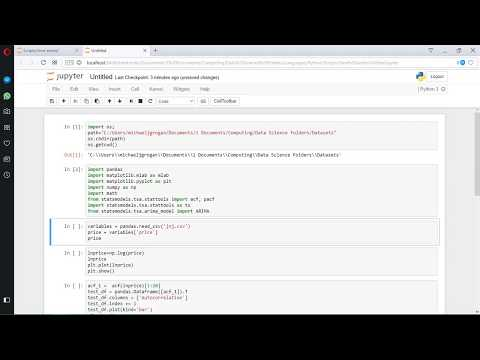

In [42]:
from IPython.display import YouTubeVideo
YouTubeVideo('o7Ux5jKEbcw', width=533, height=300)

## 5.5 Python vs. R

There’s a lot of recurrent discussion on the right tool to use for statistics and machine learning. `R` and `Python` are often considered alternatives: they are both good for statistics and machine learning tasks. But which one is the fastest? For a benchmark, it is relatively hard to make it fair: the speed of execution may well depend on the code, or the speed of the different libraries used. We decide to do classification on the Iris dataset. It is a relatively easy Machine Learning project, which seems to make for a fair comparison. We use the commonly used libraries in both `R` and `Python`. The following steps are executed:

1. Read a csv file with the iris data.
2. Randomly split the data in 80% training data and 20% test data.
3. Fit a number of models (logistic regression, linear discriminant analysis, k-nearest neighbors, and support vector machines) on the training data using built-in grid-search and cross-validation methods
4. Evaluate each of those best models on the test data and select the best model

We get the following results:

In [43]:
# %load resources/python_vs_R.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

def main():

    names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Name"]
    iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = names)
    train, test = train_test_split(iris_data, test_size=0.2)

    X_train = train.drop('Name', axis=1)
    y_train = train['Name']
    X_test = test.drop('Name', axis=1)
    y_test = test['Name']

    # logistic regression
    lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
    lr.fit(X_train, y_train)

    # linear discriminant analysis
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,y_train)

    # KNN (k-nearest neighbours)
    parameters = {'n_neighbors': range(1,11)}
    knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring = 'accuracy', cv = KFold(n_splits=5))
    knn.fit(X_train,y_train)

    # SVM
    parameters = {'C': range(1,11)}
    svc = GridSearchCV(svm.SVC(kernel = 'linear'), parameters, scoring = 'accuracy', cv = KFold(n_splits=5))
    svc.fit(X_train,y_train)

    # evaluate
    lr_test_acc = lr.score(X_test,y_test)
    lda_test_acc = lda.score(X_test,y_test)
    knn_test_acc = knn.best_estimator_.score(X_test,y_test)
    svc_test_acc= svc.best_estimator_.score(X_test,y_test)

    # print(lr_test_acc, lda_test_acc, knn_test_acc, svc_test_acc)


In [44]:
from datetime import datetime as dt

In [45]:
now = dt.now()
for i in range(5):
    main()
print(dt.now() - now)

0:00:05.675866


It seems that the `Python` code runs a little bit faster. However, when we make the model more complex, or use multiprocessing, the difference is even higher! If speed matters, using `Python` is the best alternative.

### 🔴 *Next Week:*

In [46]:
np.random.choice(['Machine learning 2','Something else'], p=[0.99,0.01])

'Machine learning 2'